In [1]:
import torch
import torchvision
import torch.nn as nn

import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image


c:\Users\kde96\.conda\envs\PyeonHaeng\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

device = 'cuda' if torch.cuda.is_available() else 'cpu'
cnn_model = torchvision.models.resnet34(weights=True)
num_features = cnn_model.fc.in_features
cnn_model.fc = nn.Linear(num_features, 9)
cnn_model.load_state_dict(torch.load('./PyeonHaengModel.pth'))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn_model.parameters(), lr=0.001, momentum=0.9)

cnn_model.cuda()


transforms_test = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

class_names = ['beverage_bottle', 'beverage_can', 'beverage_milk', 'dailynecessity', 'iceCream', 'instanceFood', 'noodle_bag', 'noodle_cup', 'snack']


c:\Users\kde96\.conda\envs\PyeonHaeng\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    
    plt.imshow(input)
    plt.title(title)
    plt.show()


In [4]:
# 이미지 분류 함수 정의
def classify_image(image_path, model, transforms):
    image = Image.open(image_path)
    image = transforms(image).unsqueeze(0).to(device)
    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
    return preds[0]


1.jpg: beverage_can


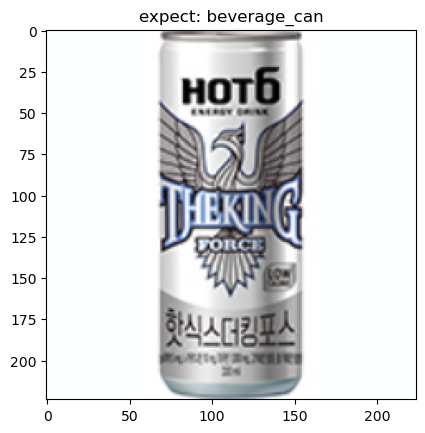

10.jpg: instanceFood


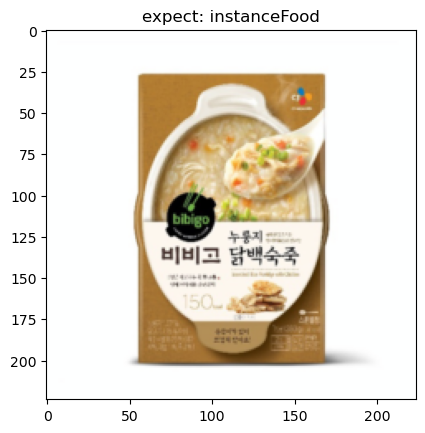

100.jpg: iceCream


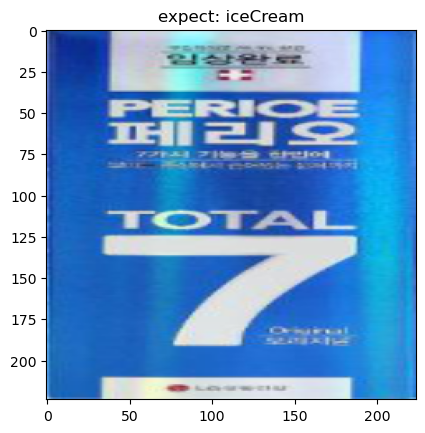

1000.jpg: iceCream


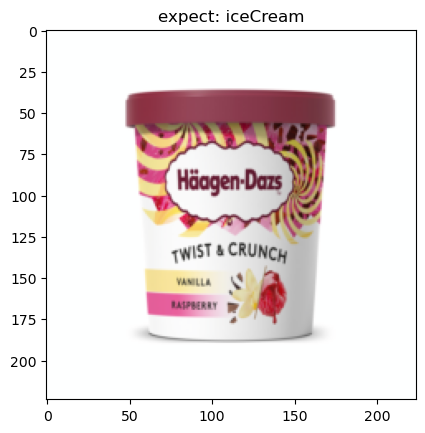

10000.jpg: iceCream


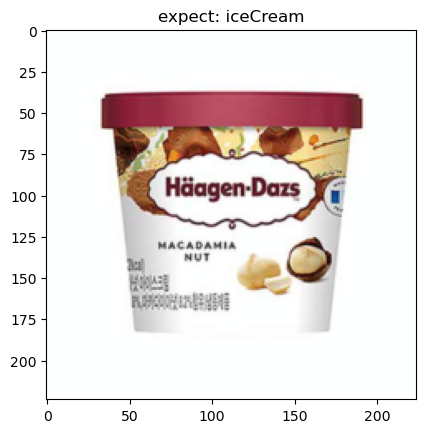

10001.jpg: instanceFood


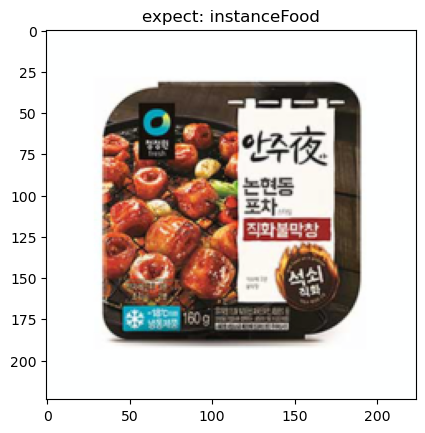

10002.jpg: instanceFood


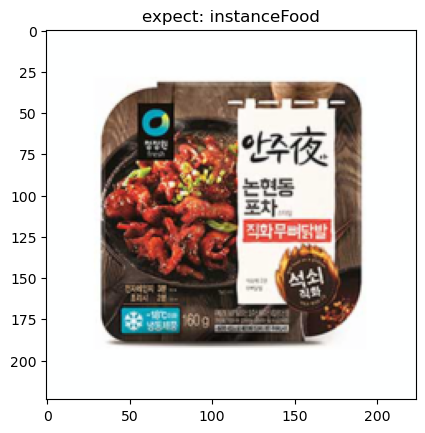

10003.jpg: instanceFood


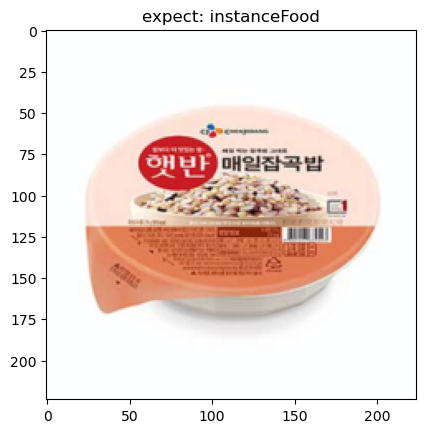

10004.jpg: iceCream


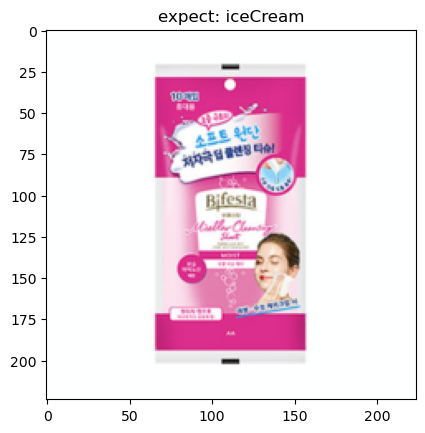

10005.jpg: iceCream


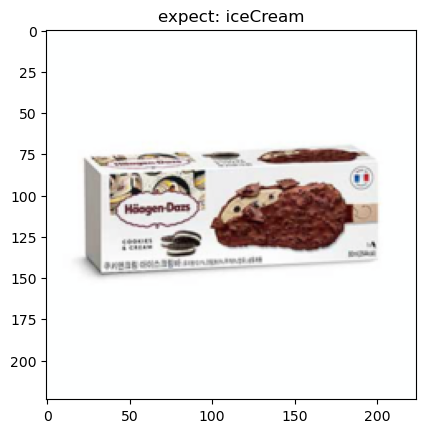

10006.jpg: instanceFood
10007.jpg: iceCream
10008.jpg: iceCream
10009.jpg: iceCream
1001.jpg: iceCream
10010.jpg: iceCream
10011.jpg: iceCream
10012.jpg: iceCream
10013.jpg: beverage_bottle
10014.jpg: iceCream
10015.jpg: beverage_bottle
10016.jpg: beverage_bottle
10017.jpg: instanceFood
10018.jpg: iceCream
10019.jpg: iceCream
1002.jpg: iceCream
10020.jpg: iceCream
10021.jpg: beverage_can
10022.jpg: beverage_can
10023.jpg: iceCream
10024.jpg: beverage_bottle
10025.jpg: beverage_bottle
10026.jpg: beverage_bottle
10027.jpg: beverage_bottle
10028.jpg: iceCream
10029.jpg: instanceFood
1003.jpg: iceCream
10030.jpg: iceCream
10031.jpg: iceCream
10032.jpg: beverage_bottle
10033.jpg: beverage_bottle
10034.jpg: beverage_bottle
10035.jpg: iceCream
10036.jpg: iceCream
10037.jpg: beverage_bottle
10038.jpg: beverage_bottle
10039.jpg: iceCream
1004.jpg: iceCream
10040.jpg: iceCream
10041.jpg: iceCream
10042.jpg: iceCream
10043.jpg: beverage_bottle
10044.jpg: beverage_can
10045.jpg: iceCream
10046.jpg

RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0

In [7]:
folder_path = './dataset/AI-dataset/data/test'
cnt = 0
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    predicted_class = classify_image(file_path, cnn_model, transforms_test)
    print(f"{file_name}: {class_names[predicted_class]}")
    
    if cnt < 10:
      image = Image.open(file_path)
      image = transforms_test(image).unsqueeze(0).to(device)

      imshow(image.cpu().data[0], title='expect: ' + class_names[predicted_class])
      cnt += 1
    else:
       break
      

